In [2]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [3]:
# Task 1: Load the dataset using pandas
data = pd.read_csv('environmental_data_lab8.csv')
data

,date,station,air_quality_index,temperature,precipitation
0,01-01-2023,ST001,152,19.432104,2.375433
1,02-01-2023,ST001,142,10.501780,9.713951
2,03-01-2023,ST001,64,18.051979,1.809770
3,04-01-2023,ST001,156,15.286200,8.543851
4,05-01-2023,ST001,121,18.187434,4.922779
...,...,...,...,...,...
725,27-12-2023,ST002,67,28.327826,2.871380
726,28-12-2023,ST002,87,13.289192,7.928544
727,29-12-2023,ST002,164,27.895624,5.775934
728,30-12-2023,ST002,64,32.725813,6.345824


In [4]:
# Task 2: Convert the date column to datetime type
data['date'] = pd.to_datetime(data['date'], format='%d-%m-%Y', errors='coerce')

In [5]:
# Task 3: Group the data by station and calculate the monthly average temperature and total precipitation
data['month'] = data['date'].dt.to_period('M')
monthly_data = data.groupby(['station', 'month']).agg({
    'temperature': 'mean',
    'precipitation': 'sum'
}).reset_index()

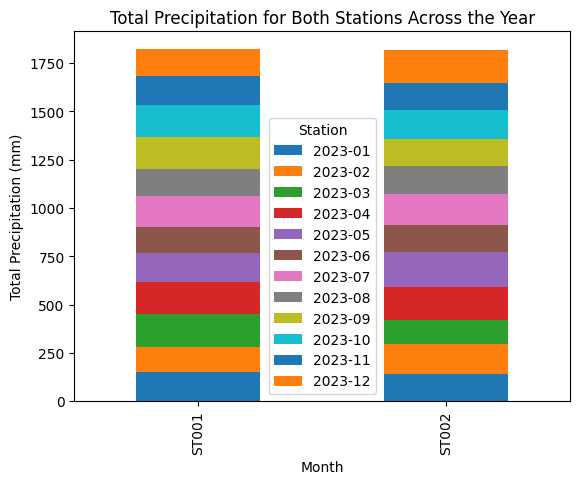

In [6]:
# Task 4: Create a bar plot that shows the total precipitation for both stations across the year
total_precipitation = data.groupby(['station', data['date'].dt.to_period('M')])['precipitation'].sum().unstack()
total_precipitation.plot(kind='bar', stacked=True)
plt.title('Total Precipitation for Both Stations Across the Year')
plt.xlabel('Month')
plt.ylabel('Total Precipitation (mm)')
plt.legend(title='Station')
plt.show()

In [7]:
# Task 5: Plot a pie chart showing the percentage of days with different AQI categories for one of the stations
station_data = data[data['station'] == 'Station 1']
aqi_categories = station_data['AQI_Category'].value_counts()
aqi_categories.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['green', 'orange', 'red'])
plt.title('Percentage of Days with Different AQI Categories for Station 1')
plt.ylabel('')
plt.show()

KeyError: 'AQI_Category'

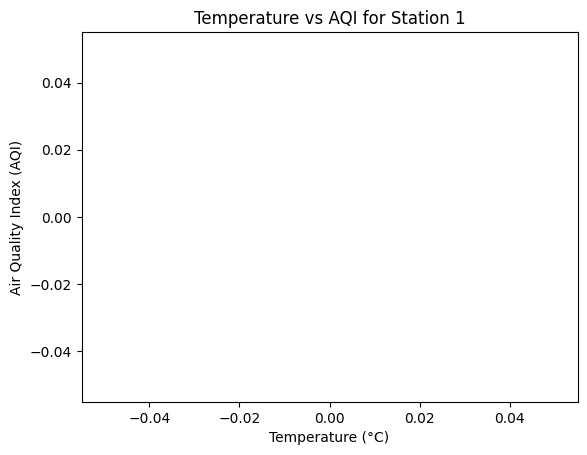

In [14]:
# Task 6: Create a scatter plot comparing the daily temperature and AQI values for one station
colors = {'Good': 'green', 'Moderate': 'orange', 'Unhealthy': 'red'}
station_data['AQI_Category'] = pd.cut(station_data['air_quality_index'], bins=[0, 50, 100, float('inf')], labels=['Good', 'Moderate', 'Unhealthy'])
plt.scatter(station_data['temperature'], station_data['air_quality_index'], c=station_data['AQI_Category'].map(colors))
plt.title('Temperature vs AQI for Station 1')
plt.xlabel('Temperature (°C)')
plt.ylabel('Air Quality Index (AQI)')
plt.show()

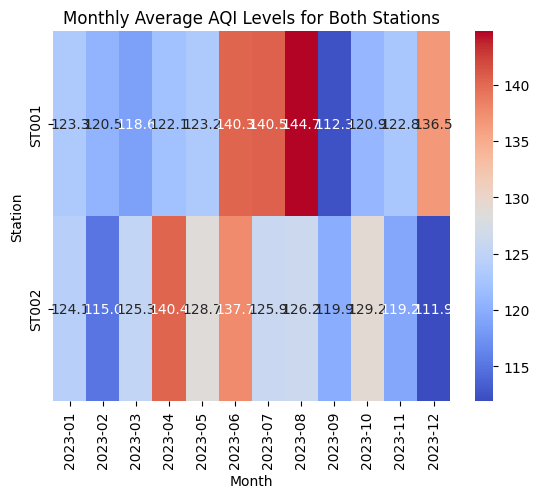

In [15]:
# Task 7: Generate a heatmap showing the monthly average AQI levels for both stations
monthly_aqi = data.groupby(['station', 'month'])['air_quality_index'].mean().unstack()
sns.heatmap(monthly_aqi, cmap='coolwarm', annot=True, fmt=".1f")
plt.title('Monthly Average AQI Levels for Both Stations')
plt.xlabel('Month')
plt.ylabel('Station')
plt.show()